In [1]:
from google.colab import files
files.upload()


Saving student_feedback.csv to student_feedback (2).csv


{'student_feedback (2).csv': b',Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance\n0,340,5,2,7,6,9,2,1,8\n1,253,6,5,8,6,2,1,2,9\n2,680,7,7,6,5,4,2,3,1\n3,806,9,6,7,1,5,9,4,6\n4,632,8,10,8,4,6,6,9,9\n5,832,7,2,7,8,3,5,1,4\n6,772,9,3,5,2,10,3,8,1\n7,961,9,8,7,4,4,3,3,10\n8,814,6,5,8,6,4,4,7,9\n9,863,5,9,4,7,9,4,4,5\n10,576,10,3,8,6,6,3,6,9\n11,702,8,4,7,1,2,1,8,8\n12,541,5,4,4,2,2,7,8,1\n13,552,5,6,7,2,7,4,4,2\n14,510,6,7,8,3,4,7,7,6\n15,159,7,7,6,6,3,9,3,1\n16,223,9,10,4,5,7,10,10,6\n17,807,8,3,4,2,2,4,6,1\n18,525,9,9,4,3,5,5,9,2\n19,799,5,6,5,4,2,1,1,7\n20,24,9,10,6,10,2,10,1,9\n21,509,8,2,7,5,2,3,4,4\n22,797,9,10,4,10,9,2,10,7\n23,418,8,8,6,7,9,5,2,8\n24,48,5,5,4,2,1,10,10,9\n25,657,9,5,7,3,2,8,10,6\n26,864,9,8,5,2,3,9,2,8\n27,861,5,6,4,5,4,4,6,6\n28,118,

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("student_feedback.csv")
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [4]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [5]:
df.columns


Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [6]:
df.describe()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
avg_scores = df.mean()
avg_scores


,0
Unnamed: 0,500.000000
Student ID,500.000000
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Degree of difficulty of assignments,5.430569
Solves doubts willingly,5.474525
Structuring of the course,5.636364
Provides support for students going above and beyond,5.662338
Course recommendation based on relevance,5.598402


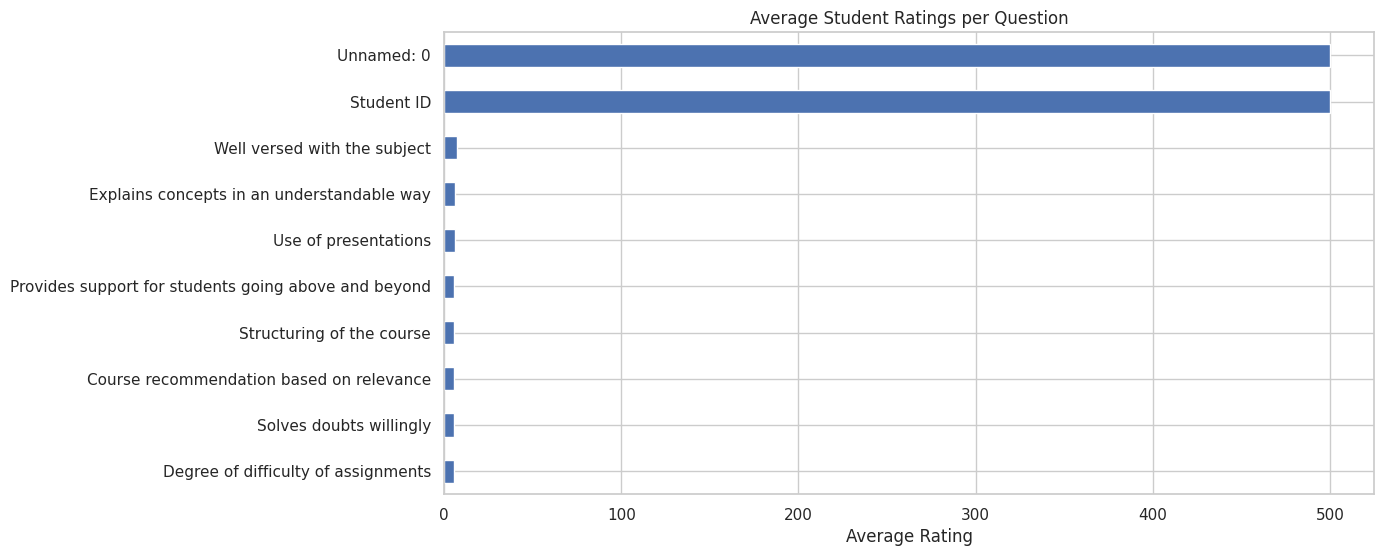

In [8]:
plt.figure(figsize=(12,6))
avg_scores.sort_values().plot(kind="barh")
plt.title("Average Student Ratings per Question")
plt.xlabel("Average Rating")
plt.show()


In [9]:
avg_scores.sort_values(ascending=False).head(3)


,0
Unnamed: 0,500.000000
Student ID,500.000000
Well versed with the subject,7.497502


In [10]:
avg_scores.sort_values(ascending=False).head(3)


,0
Unnamed: 0,500.000000
Student ID,500.000000
Well versed with the subject,7.497502


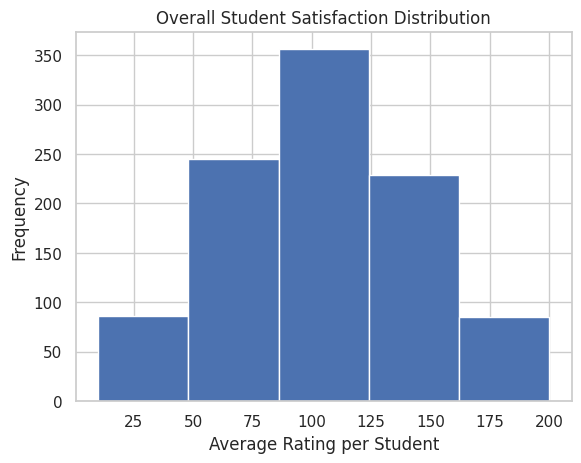

In [11]:
plt.figure()
df.mean(axis=1).plot(kind="hist", bins=5)
plt.title("Overall Student Satisfaction Distribution")
plt.xlabel("Average Rating per Student")
plt.show()


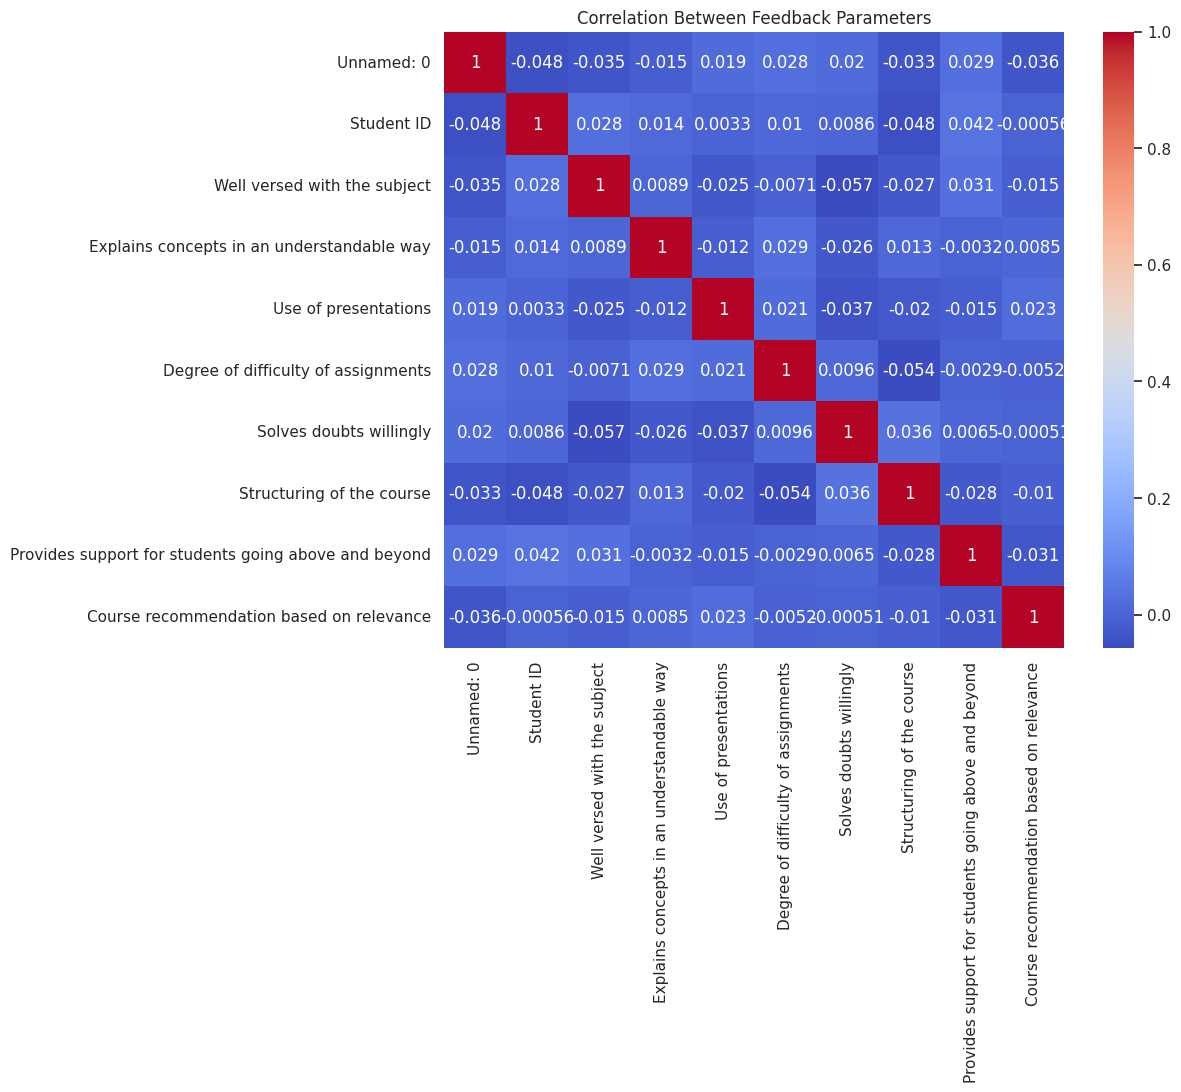

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Feedback Parameters")
plt.show()


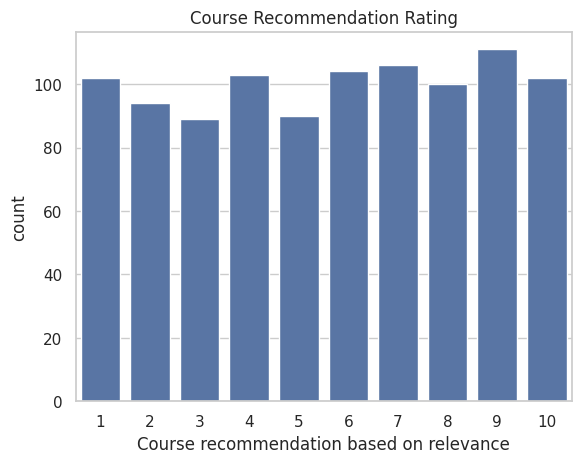

In [13]:
plt.figure()
sns.countplot(x="Course recommendation based on relevance", data=df)
plt.title("Course Recommendation Rating")
plt.show()


In [14]:
df["Overall_Score"] = (df.mean(axis=1) / 5) * 100
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Score
0,0,340,5,2,7,6,9,2,1,8,760.0
1,1,253,6,5,8,6,2,1,2,9,586.0
2,2,680,7,7,6,5,4,2,3,1,1434.0
3,3,806,9,6,7,1,5,9,4,6,1712.0
4,4,632,8,10,8,4,6,6,9,9,1392.0


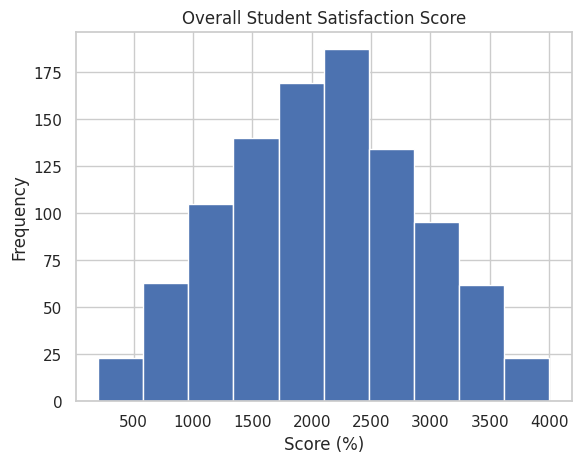

In [15]:
plt.figure()
df["Overall_Score"].plot(kind="hist", bins=10)
plt.title("Overall Student Satisfaction Score")
plt.xlabel("Score (%)")
plt.show()


In [16]:
def classify_satisfaction(score):
    if score >= 80:
        return "Highly Satisfied"
    elif score >= 60:
        return "Satisfied"
    else:
        return "Needs Improvement"

df["Satisfaction_Level"] = df["Overall_Score"].apply(classify_satisfaction)
df["Satisfaction_Level"].value_counts()


,count
Satisfaction_Level,
Highly Satisfied,1001


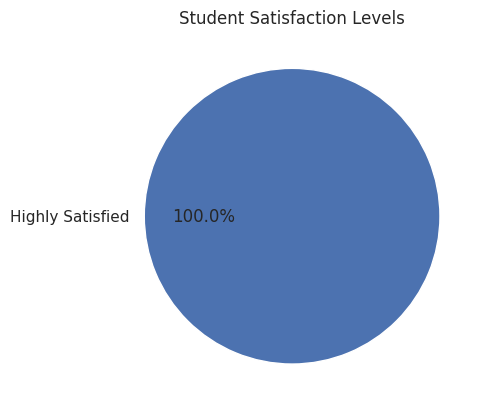

In [17]:
plt.figure()
df["Satisfaction_Level"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Student Satisfaction Levels")
plt.show()


In [18]:
df["Average_Rating"] = df.select_dtypes(include='number').mean(axis=1)
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall_Score,Satisfaction_Level,Average_Rating
0,0,340,5,2,7,6,9,2,1,8,760.0,Highly Satisfied,103.636364
1,1,253,6,5,8,6,2,1,2,9,586.0,Highly Satisfied,79.909091
2,2,680,7,7,6,5,4,2,3,1,1434.0,Highly Satisfied,195.545455
3,3,806,9,6,7,1,5,9,4,6,1712.0,Highly Satisfied,233.454545
4,4,632,8,10,8,4,6,6,9,9,1392.0,Highly Satisfied,189.818182


In [19]:
def rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["Sentiment"] = df["Average_Rating"].apply(rating_to_sentiment)
df["Sentiment"].value_counts()


,count
Sentiment,
Positive,1001


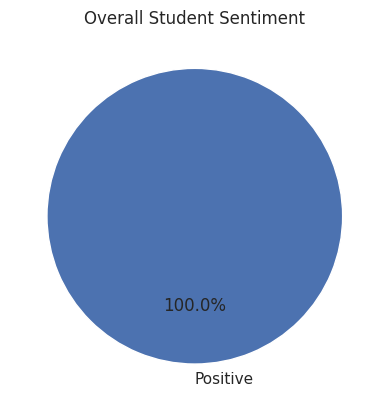

In [20]:
plt.figure()
df["Sentiment"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Overall Student Sentiment")
plt.ylabel("")
plt.show()


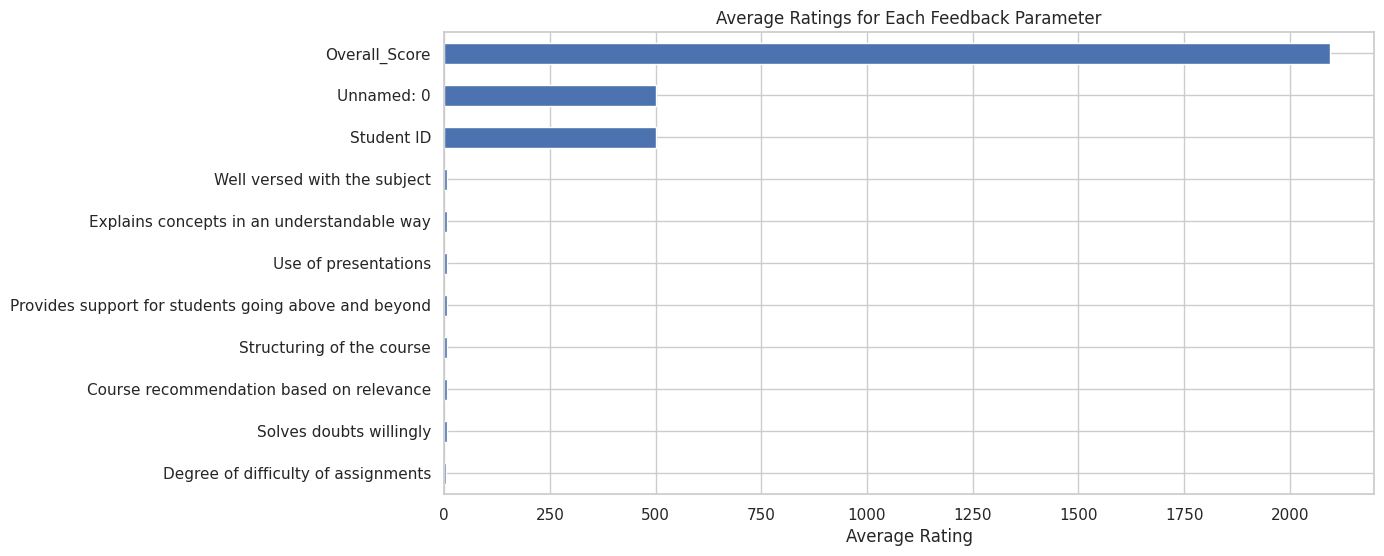

In [21]:
avg_scores = df.drop(columns=["Average_Rating", "Sentiment"]).mean(numeric_only=True)

plt.figure(figsize=(12,6))
avg_scores.sort_values().plot(kind="barh")
plt.xlabel("Average Rating")
plt.title("Average Ratings for Each Feedback Parameter")
plt.show()

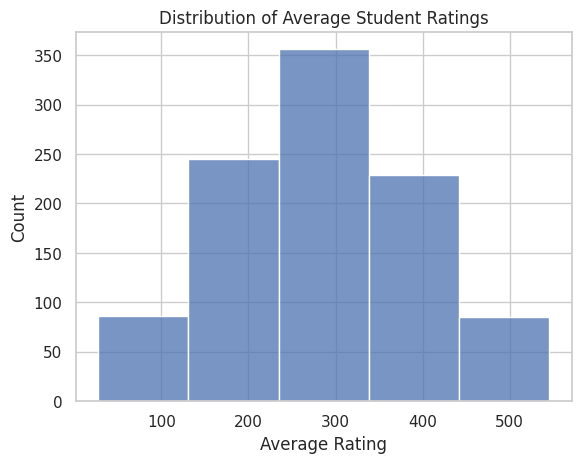

In [22]:
plt.figure()
sns.histplot(df["Average_Rating"], bins=5)
plt.title("Distribution of Average Student Ratings")
plt.xlabel("Average Rating")
plt.show()


In [23]:
text = " ".join(df.columns)


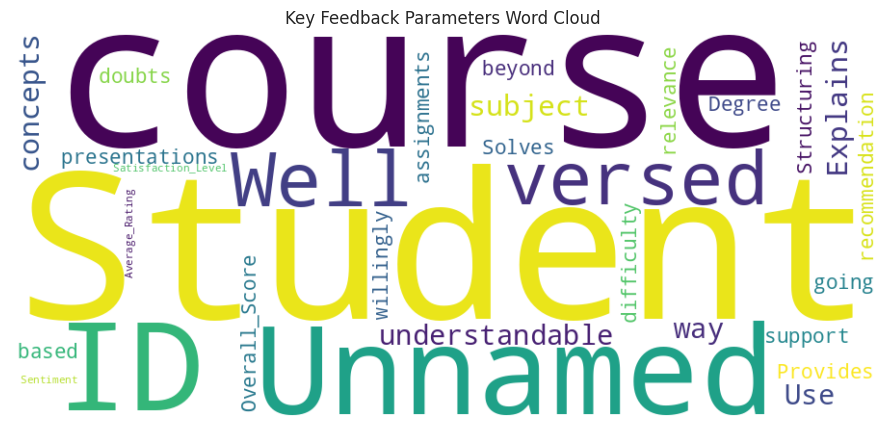

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=900,
    height=400,
    background_color="white"
).generate(text)

plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Key Feedback Parameters Word Cloud")
plt.show()
